# Why do 20% of patients miss their scheduled appointments?
## by: Abdullah Raslan

## Investigation Overview

In this investigation, I will be focusing on the likelihood of whether or not patients show up for their appointment(s). I have analyzed a dataset that contains information from over 100,000 medical appointments in Brazil, to see how the characteristics I chose may influence this likelihood.

## Dataset Overview

This dataset includes information about more than 100,000 medical appointments for patients in Brazil and many of them did not show up on their scheduled appointments.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('no_show_app_clean.csv')

## What is the proportion of patients who miss their scheduled appointments?

> Around 20% of patients in the dataset miss their scheduled appointments, So we need to dig deep in the correlation between their characteristics and showing up status.

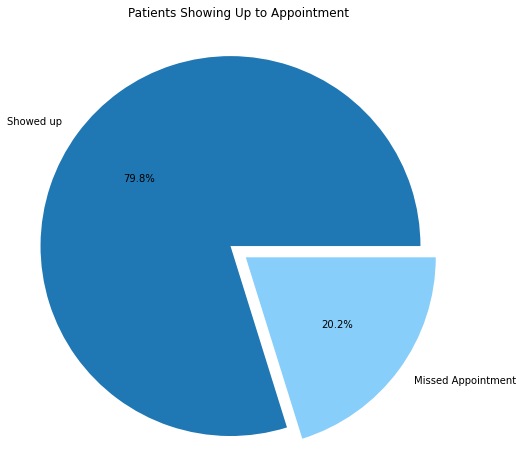

In [3]:
plt.figure(figsize=(8,8))
colors = [sb.color_palette()[0], 'lightskyblue']
show_pie = df.not_shown.value_counts()
explode = (0.1, 0)
plt.pie(show_pie, labels=['Showed up', 'Missed Appointment'], autopct='%1.1f%%', colors = colors, explode=explode);
plt.axis('square')
plt.title('Patients Showing Up to Appointment');
plt.show()

## Distribution of Appointment Delay 

> Plotted on a logarithmic scale, the distribution of appointment delay is right skewed and the highest delay exceeds 175 days.

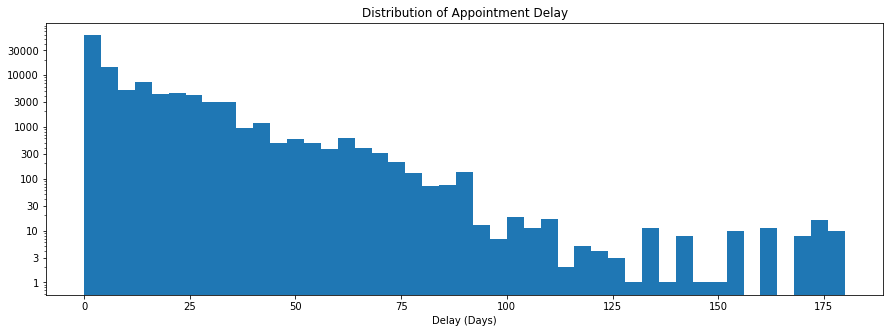

In [4]:
binsize = 4
plt.figure(figsize=[15, 5])
bins = np.arange(0, df['appointment_delay'].max()+binsize, binsize)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'appointment_delay', bins = bins)
plt.title('Distribution of Appointment Delay')
plt.xlabel('Delay (Days)')
plt.yscale('log')
plt.yticks(ticks, labels);
plt.show()

## Correlation between appointment delay and showing up status

> Regardless of outliers, the likelihood of missing an appointment increases when the delay days are larger.

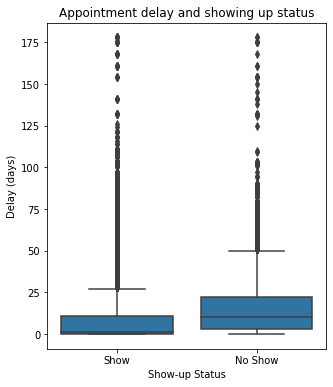

In [5]:
plt.figure(figsize=[5, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data=df, x='not_shown', y='appointment_delay', color=base_color);
plt.title('Appointment delay and showing up status');
plt.xlabel('Show-up Status');
plt.ylabel('Delay (days)');

## Correlation between patient characteristics and missing an appointment

> With a slight difference in proportion, if the patient is not hypertensive or not diabetic its more likely that he/she will miss the appointment

In [6]:
hyper_prop = (df.groupby('not_shown').hypertension.value_counts() / 
                          df.groupby('hypertension').count().not_shown)
hyper_prop = hyper_prop.reset_index(name='proportion')
diab_prop = (df.groupby('not_shown').diabetes.value_counts() / 
                          df.groupby('diabetes').count().not_shown)
diab_prop = diab_prop.reset_index(name='proportion')
hyper_prop = hyper_prop.pivot(index = 'hypertension', columns = 'not_shown', values = 'proportion')
diab_prop = diab_prop.pivot(index = 'diabetes', columns = 'not_shown', values = 'proportion')

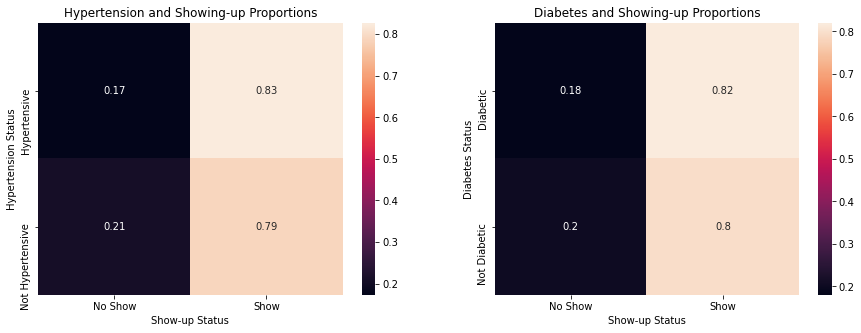

In [7]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sb.heatmap(hyper_prop, annot = True);
plt.title('Hypertension and Showing-up Proportions');
plt.xlabel('Show-up Status')
plt.ylabel('Hypertension Status')

plt.subplot(1, 2, 2)
sb.heatmap(diab_prop, annot = True);

plt.title('Diabetes and Showing-up Proportions');
plt.xlabel('Show-up Status');
plt.ylabel('Diabetes Status');